### Problem Statement :

A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The 
company wants to know 

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 

### Business Goal :

* Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether 
  to invest in them or not.
* Determine the optimal value of lambda for ridge and lasso regression.
* This model will then be used by the management to understand how exactly the prices vary with the variables
* They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
* The model will be a good way for the management to understand the pricing dynamics of a new market.

Submitted By: Puspanjali Sarma

Batch: ML- C43

Institute: Post Graduate Diploma in Machine Learning and AI - IIIT, Bangalore

## Step 1: Reading and Understanding the Data

In [36]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [37]:
# Importing dataset

df = pd.read_csv('train.csv', encoding = 'latin')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
# inspect housingInfo dataframe

print("*********************************  Info *******************************************") 
print(df.info())
print("*********************************  Shape ******************************************") 
print(df.shape)
print("**************************** Columns having null values *****************************")
print(df.isnull().any())
print("**************************** Describe *****************************")
df.describe()

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle  

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 2: Data Cleaning 

#### Removing/Imputing NaN values in Categorical attributes

In [39]:
# check for null values in all categorical columns

df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [40]:
# Replace NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    df[col]=df[col].fillna('None')

#### Remove categorical attributes that have more than 85% data associated to one value.

We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed to one value

In [41]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = df.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

df.drop(columnsToBeRemoved, axis = 1, inplace = True)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [42]:
# once again check for null values in all categorical columns

df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

No more null values in the categorical variables 

#### Removing null values in Numerical attributes

In [43]:
# check the null values in the numerical data

df.select_dtypes(include=['int64','float']).isnull().sum()[df.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [44]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].median())

In [45]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

df['GarageYrBlt']= df['GarageYrBlt'].fillna(0)
df['GarageYrBlt']= df['GarageYrBlt'].astype(int)

In [46]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df['IsRemodelled'] = df.apply(checkForRemodel, axis=1)
df.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [47]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['BuiltOrRemodelAge'] = df.apply(getBuiltOrRemodelAge, axis=1)
df.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [48]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df['OldOrNewGarage'] = df['GarageYrBlt'].apply(getGarageConstructionPeriod)
df.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [49]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns for further analysis

df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

#### Remove numerical attributes that have more than 85% data associated to one value.

We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed to one value

In [50]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = df.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
df.drop(columnsToBeRemoved, axis = 1, inplace = True)

df.drop(['MoSold'], axis = 1, inplace = True)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [51]:
# check for percentage of null values in each column

percent_missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(percent_missing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


Hence there are no null values in the dataset

#### Check for Duplicates

In [52]:
# Check if there are any duplicate values in the dataset

df[df.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


No duplicate entries found !!!

#### Outlier Treatment

In [53]:
# Checking outliers at 25%,50%,75%,90%,95% and above

df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


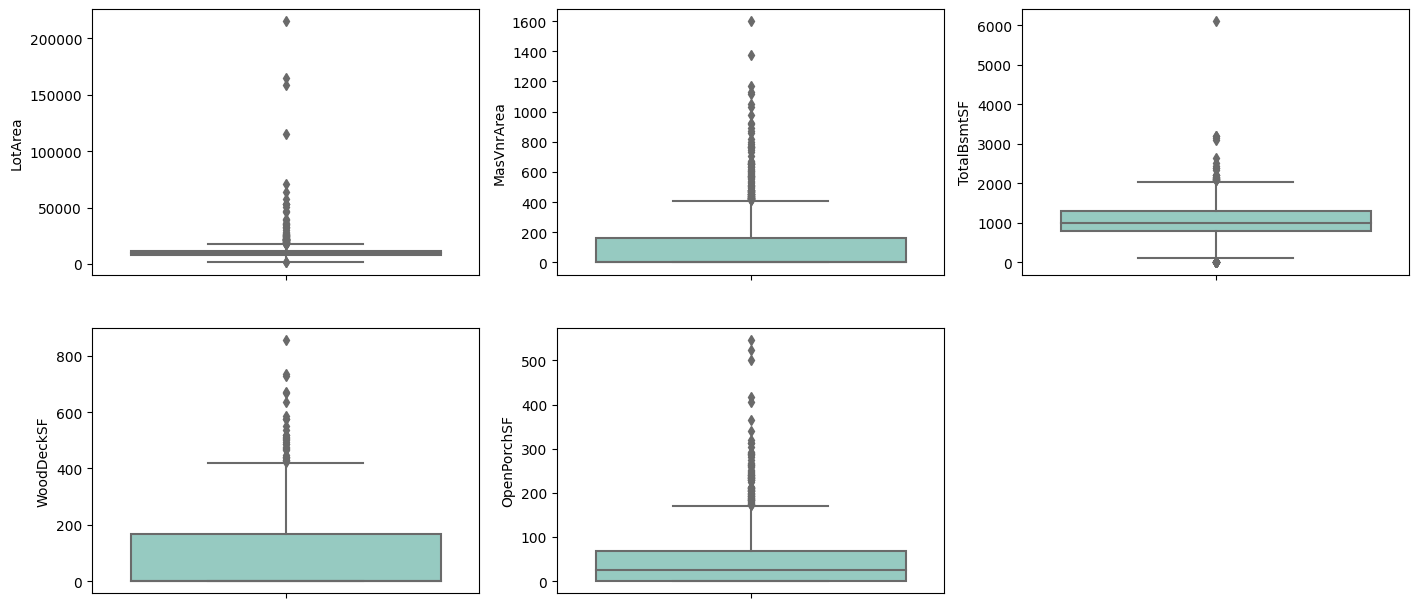

In [54]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = df)
plt.show()

In [55]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = df['MasVnrArea'].quantile(0.98)
df = df[df["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
df = df[df["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
df = df[df["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = df['OpenPorchSF'].quantile(0.99)
df = df[df["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [56]:
# Determine the percentage of data retained

num_data = round(100*(len(df)/1460),2)
print(num_data)

93.01


## Step 3: Data Visualization 

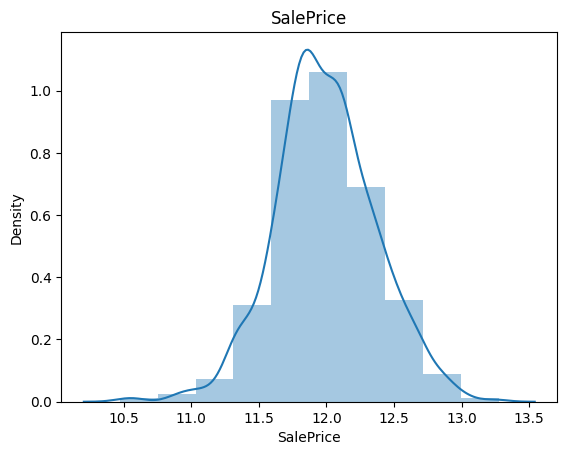

In [57]:
# Visualise the target variable -> SalePrice after transforming the sales price

df['SalePrice'] = np.log1p(df['SalePrice'])

plt.title('SalePrice')
sns.distplot(df['SalePrice'], bins=10)
plt.show()

The target value seems to be normalized with some noise.

<Figure size 1000x500 with 0 Axes>

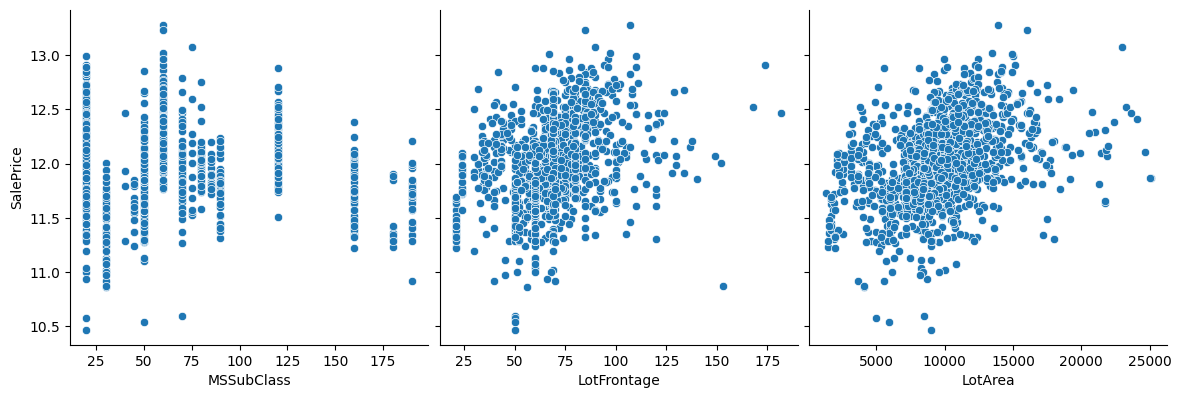

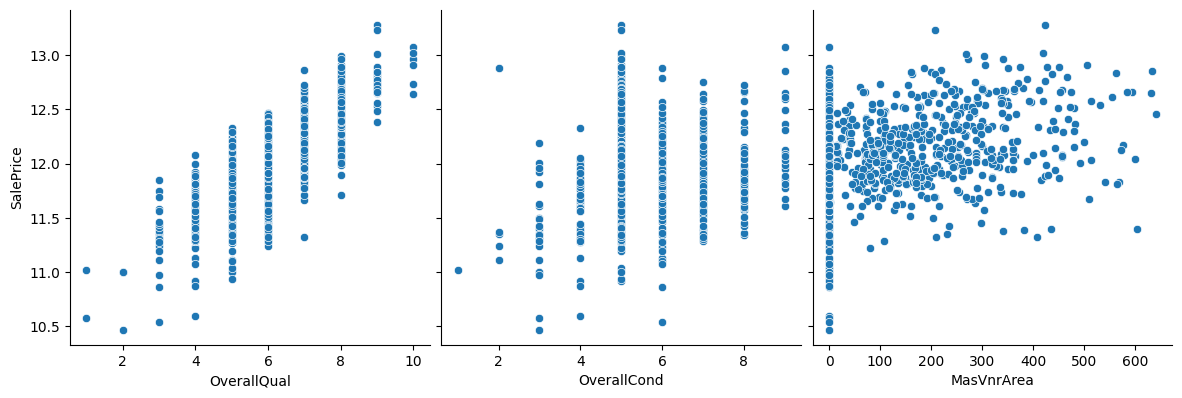

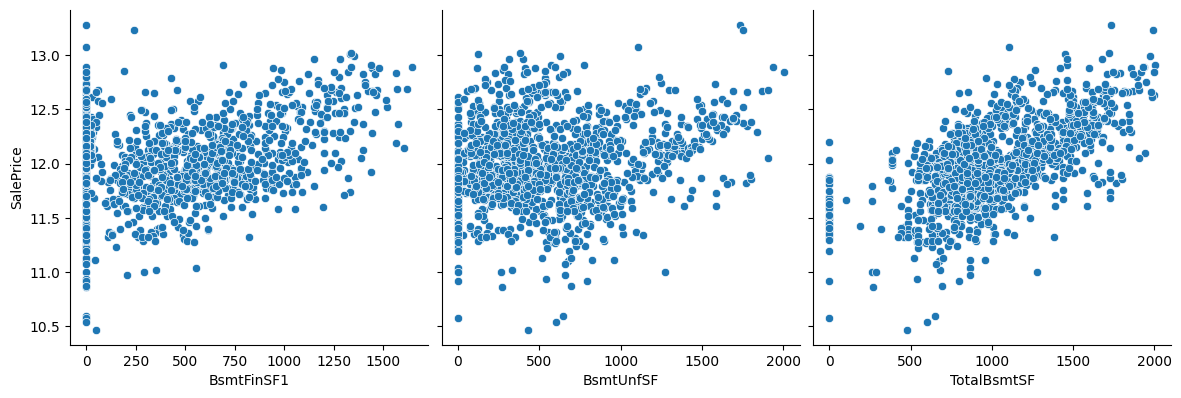

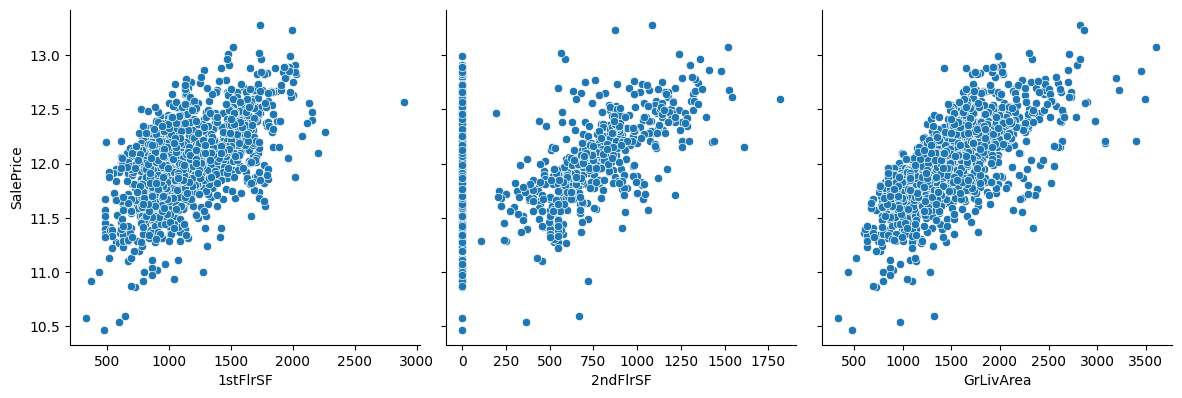

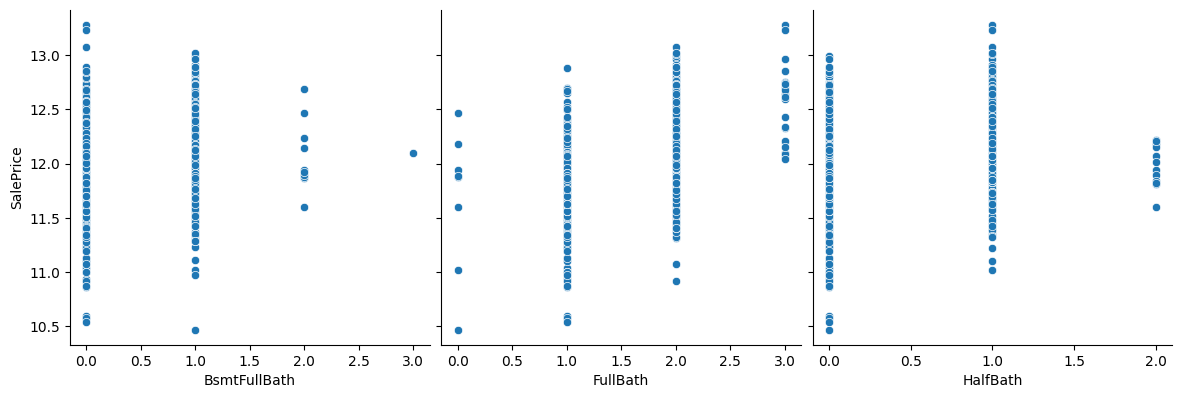

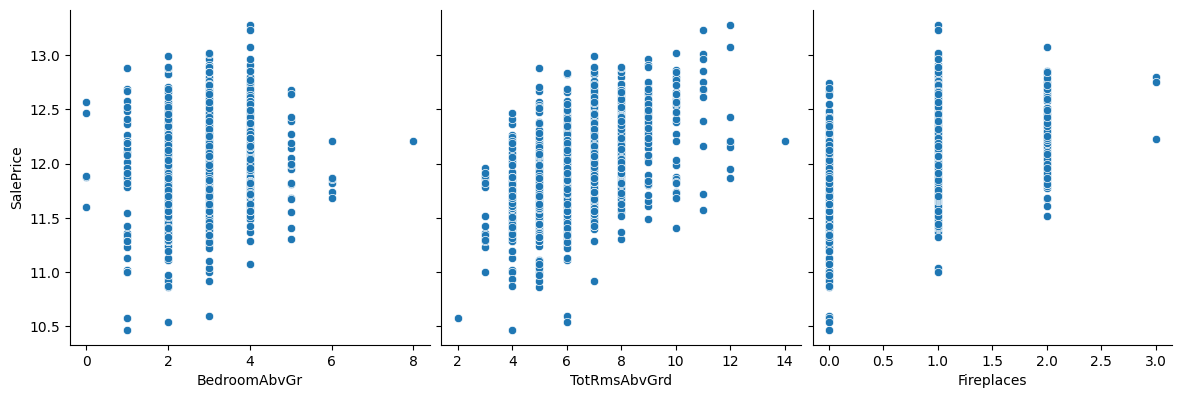

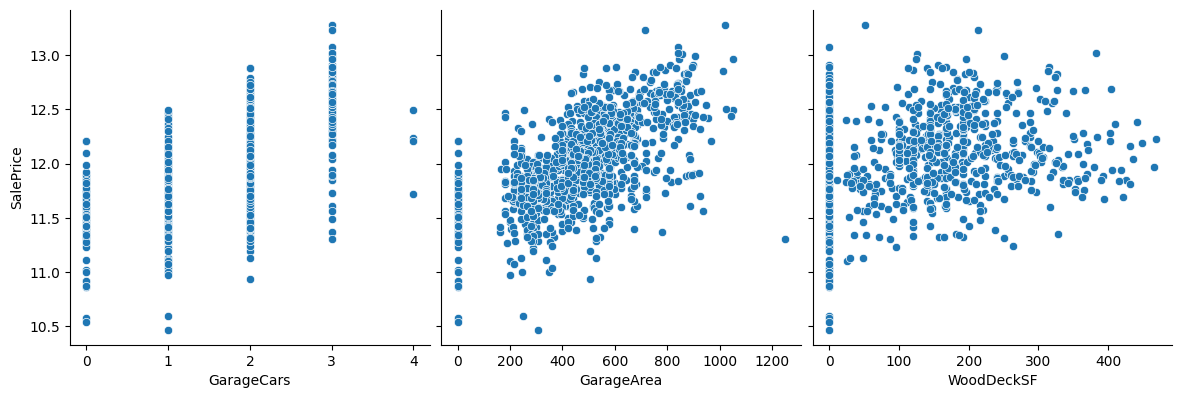

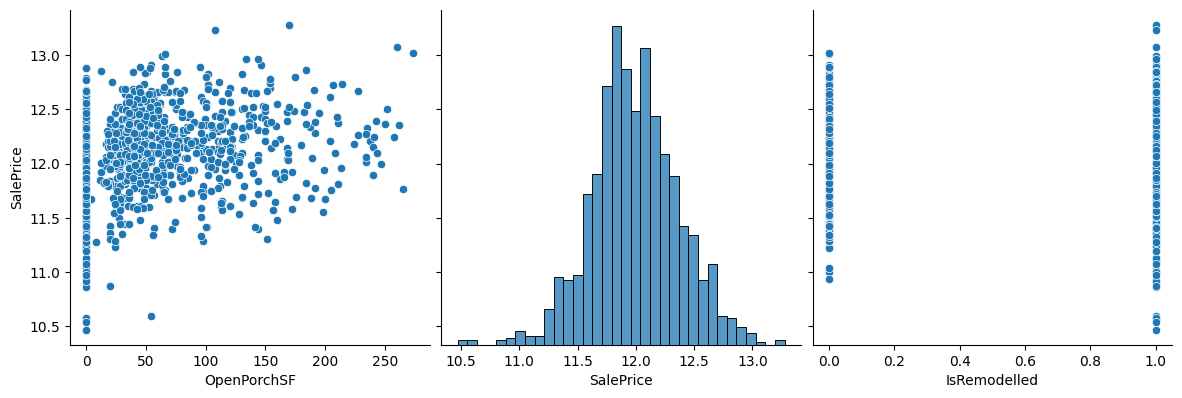

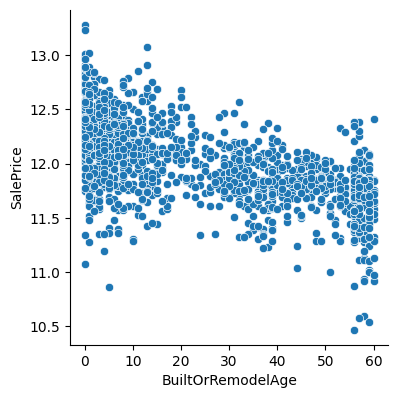

In [58]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

Observations :
    - 1stFlrSF, GrLivArea seems to be showing correlation towards right
    - Rest of the variables are too scattered and hence can be understood during further analysis

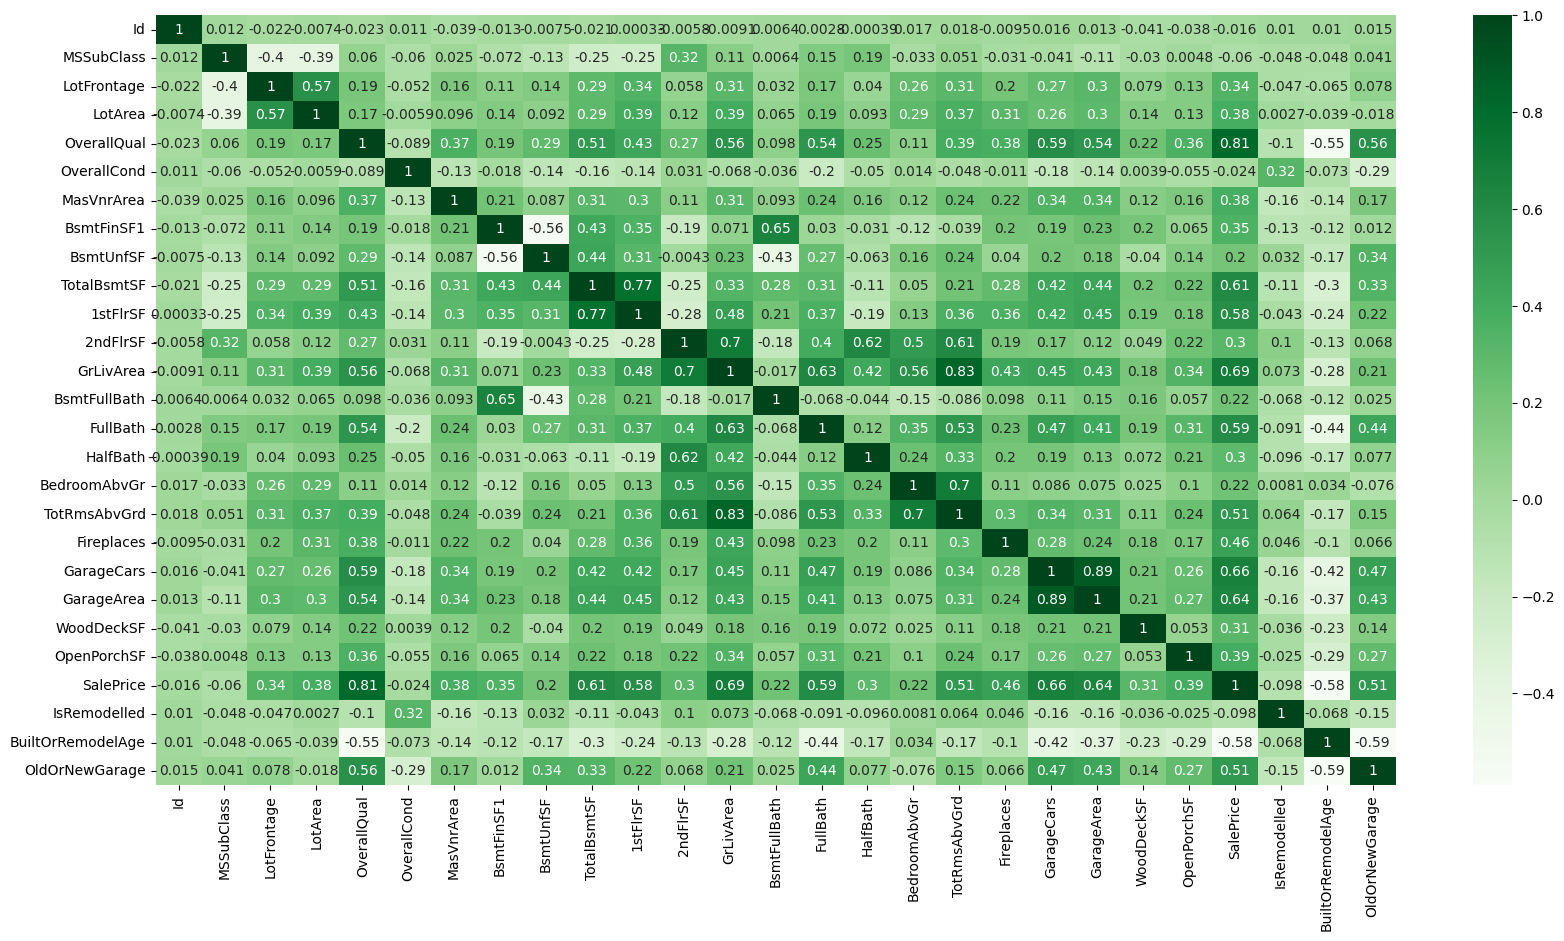

In [59]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap="Greens")
plt.show()

#### Removing following columns which shows high correlation
    - TotRmsAbvGrd and GrLivArea show 82%
    - Garage Area and Garage Cars show 88%

Hence dropping TotRmsAbvGrd and Garage Cars

In [60]:
# Removing the highly correlated variables

df.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [61]:
# Check the shape of the dataframe

df.shape

(1358, 47)

## Step 4: Data Preparation

  - Converting categorical data into numercal data 
  - Creating Dummies

In [62]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

df['d_LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df['d_ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['d_BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['d_BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
df['d_HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df['d_BldgType'] = df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
df['d_HouseStyle'] = df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df['d_Fence'] = df['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
df['d_LotConfig'] = df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
df['d_MasVnrType'] = df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
df['d_SaleCondition'] = df['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [63]:
# drop the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

df = df.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [64]:
# For the following columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(df['MSZoning'], prefix='MSZoning', drop_first = True)
df = pd.concat([df, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood', drop_first = True)
df = pd.concat([df, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(df['RoofStyle'], prefix='RoofStyle', drop_first = True)
df = pd.concat([df, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(df['Exterior1st'], prefix='Exterior1st', drop_first = True)
df = pd.concat([df, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df = pd.concat([df, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(df['Foundation'], prefix='Foundation', drop_first = True)
df = pd.concat([df, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(df['GarageType'], prefix='GarageType', drop_first = True)
df = pd.concat([df, d_GarageType], axis = 1)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [65]:
# drop the below columns as we now have new columns derived from these columns

df = df.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 521.2 KB


All columns in the data set are now numeric !!!

## Step 5: Train Test Split

In [67]:
# Putting all feature variable to X

X = df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [68]:
# Putting response variable to y

y = df['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Scaling the features

In [69]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [77]:
# split into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

## Step 5: Recursive feature elimination (RFE)¶

    Since there are around 111 features, we will use RFE to get the best 50 features out of the 111 features and use the new
    features for further analysis

In [81]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE     
rfe = RFE(estimator=LinearRegression(), n_features_to_select=50)
rfe = rfe.fit(X_train, y_train)

In [82]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,TotalBsmtSF,True,1
5,GrLivArea,True,1
6,BsmtFullBath,True,1
7,FullBath,True,1
8,HalfBath,True,1
9,Fireplaces,True,1


In [83]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [84]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Step 6: Model Building and Evaluation

#### Ridge

In [85]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
21,10.0,-0.077965,-0.084436,1
22,20,-0.078216,-0.084438,2
20,9.0,-0.077934,-0.084439,3
19,8.0,-0.077900,-0.084442,4
18,7.0,-0.077865,-0.084450,5
17,6.0,-0.077828,-0.084463,6
16,5.0,-0.077794,-0.084490,7
15,4.0,-0.077767,-0.084572,8
14,3.0,-0.077748,-0.084665,9
23,50,-0.078868,-0.084688,10


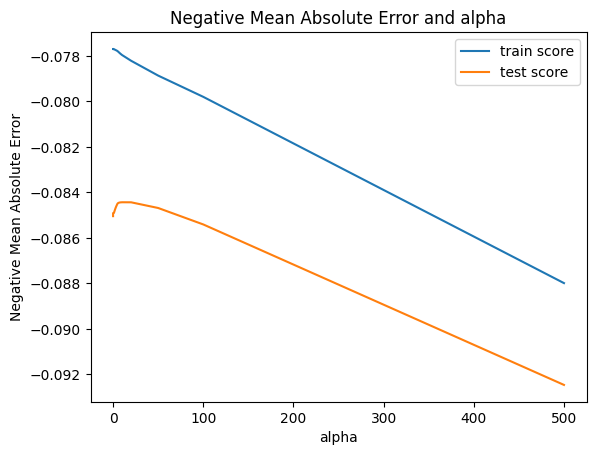

In [88]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [89]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=10.0)

In [95]:
# check the coefficient values with lambda = 10

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02073655,  0.07015166,  0.04600555,  0.03327294,  0.05127431,
        0.10048972,  0.01200782,  0.01220038,  0.01920364,  0.02188452,
        0.03729813,  0.00963756, -0.01271713, -0.0191473 ,  0.01436014,
        0.01174061,  0.01621265,  0.01687258,  0.01540576,  0.01453236,
       -0.01932013,  0.01376204,  0.05896051,  0.02242147,  0.08991238,
        0.05869507,  0.02568715, -0.01043561,  0.02290436, -0.01293567,
       -0.01074713,  0.01731429, -0.00879988,  0.01124969, -0.00142979,
        0.01536772,  0.01219552,  0.01901054, -0.00976301,  0.01115568,
       -0.00142979, -0.00902006, -0.01973173,  0.01601151, -0.0125636 ,
        0.02115983,  0.04426213,  0.01977806,  0.0065682 , -0.01005017])

In [96]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.013608925923842892

In [97]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0207
1,OverallQual,0.0702
2,OverallCond,0.0460
3,BsmtFinSF1,0.0333
4,TotalBsmtSF,0.0513
5,GrLivArea,0.1005
6,BsmtFullBath,0.0120
7,FullBath,0.0122
8,HalfBath,0.0192
9,Fireplaces,0.0219


In [98]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.0207,
 'OverallQual': 0.0702,
 'OverallCond': 0.046,
 'BsmtFinSF1': 0.0333,
 'TotalBsmtSF': 0.0513,
 'GrLivArea': 0.1005,
 'BsmtFullBath': 0.012,
 'FullBath': 0.0122,
 'HalfBath': 0.0192,
 'Fireplaces': 0.0219,
 'GarageCars': 0.0373,
 'WoodDeckSF': 0.0096,
 'IsRemodelled': -0.0127,
 'BuiltOrRemodelAge': -0.0191,
 'OldOrNewGarage': 0.0144,
 'd_BsmtQual': 0.0117,
 'd_BsmtExposure': 0.0162,
 'd_HeatingQC': 0.0169,
 'd_KitchenQual': 0.0154,
 'd_GarageFinish': 0.0145,
 'd_BldgType': -0.0193,
 'd_SaleCondition': 0.0138,
 'MSZoning_FV': 0.059,
 'MSZoning_RH': 0.0224,
 'MSZoning_RL': 0.0899,
 'MSZoning_RM': 0.0587,
 'Neighborhood_Crawfor': 0.0257,
 'Neighborhood_Edwards': -0.0104,
 'Neighborhood_NridgHt': 0.0229,
 'Neighborhood_OldTown': -0.0129,
 'Neighborhood_SWISU': -0.0107,
 'Neighborhood_StoneBr': 0.0173,
 'Exterior1st_BrkComm': -0.0088,
 'Exterior1st_BrkFace': 0.0112,
 'Exterior1st_CBlock': -0.0014,
 'Exterior1st_HdBoard': 0.0154,
 'Exterior1st_MetalSd': 0.0122,
 'Exterior1

#### RFE

In [99]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)
rfe = rfe.fit(X_train_ridge, y_train)

In [100]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.1005
12,MSZoning_RL,True,1,0.0899
1,OverallQual,True,1,0.0702
10,MSZoning_FV,True,1,0.0590
13,MSZoning_RM,True,1,0.0587
4,TotalBsmtSF,True,1,0.0513
2,OverallCond,True,1,0.0460
14,Foundation_PConc,True,1,0.0443
7,GarageCars,True,1,0.0373
3,BsmtFinSF1,True,1,0.0333


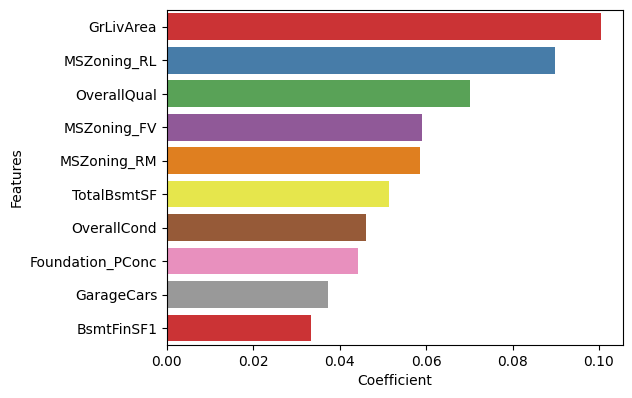

In [101]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price 
of a house.    

#### Lasso

In [102]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [103]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
4,0.0005,-0.077946,-0.084682,1
3,0.0004,-0.077868,-0.084743,2
2,0.0003,-0.077808,-0.084802,3
1,0.0002,-0.077751,-0.084845,4
5,0.001,-0.078334,-0.084875,5
0,0.0001,-0.077708,-0.084925,6
6,0.002,-0.079194,-0.085620,7
7,0.003,-0.079893,-0.086013,8
8,0.004,-0.080617,-0.086486,9
9,0.005,-0.081346,-0.087055,10


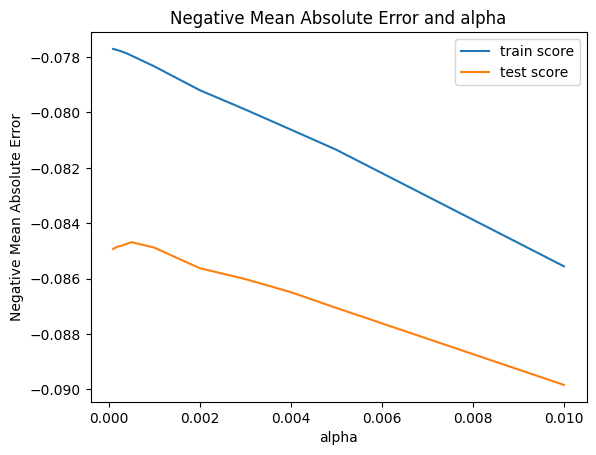

In [104]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [105]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0005)

In [106]:
# check the coefficient values with lambda = 0.0004

alpha = 0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 2.03730211e-02,  7.12342165e-02,  4.55862270e-02,  3.37515771e-02,
        5.07804467e-02,  1.03049901e-01,  1.10689323e-02,  9.82434669e-03,
        1.77760878e-02,  2.12508425e-02,  3.77320589e-02,  9.41547300e-03,
       -1.22572190e-02, -1.91716868e-02,  1.40412181e-02,  1.11056938e-02,
        1.62106736e-02,  1.65407359e-02,  1.46903720e-02,  1.45767051e-02,
       -1.89507612e-02,  1.33138172e-02,  6.98111225e-02,  2.73653105e-02,
        1.10986858e-01,  7.64408721e-02,  2.50959203e-02, -1.02859448e-02,
        2.23796922e-02, -1.34135843e-02, -1.08053464e-02,  1.67197737e-02,
       -8.67664678e-03,  1.11913402e-02, -2.61609385e-03,  1.29733217e-02,
        1.20840002e-02,  1.72553908e-02, -0.00000000e+00,  1.08701856e-02,
       -7.11523567e-05, -6.70700455e-03, -1.81151637e-02,  6.34307136e-03,
       -1.26793145e-02,  2.04519301e-02,  4.41681643e-02,  1.85451893e-02,
        6.85521046e-03, -9.19520665e-03])

In [107]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.013321135452207805

In [108]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0204
1,OverallQual,0.0712
2,OverallCond,0.0456
3,BsmtFinSF1,0.0338
4,TotalBsmtSF,0.0508
5,GrLivArea,0.1030
6,BsmtFullBath,0.0111
7,FullBath,0.0098
8,HalfBath,0.0178
9,Fireplaces,0.0213


In [109]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.020373021122878476,
 'OverallQual': 0.07123421647039858,
 'OverallCond': 0.045586226950961616,
 'BsmtFinSF1': 0.03375157710028671,
 'TotalBsmtSF': 0.05078044672936093,
 'GrLivArea': 0.10304990094281344,
 'BsmtFullBath': 0.011068932262470414,
 'FullBath': 0.009824346693659024,
 'HalfBath': 0.017776087808372303,
 'Fireplaces': 0.021250842459157697,
 'GarageCars': 0.037732058889758384,
 'WoodDeckSF': 0.009415473003844677,
 'IsRemodelled': -0.012257219026153803,
 'BuiltOrRemodelAge': -0.019171686816924376,
 'OldOrNewGarage': 0.014041218096535708,
 'd_BsmtQual': 0.011105693789564913,
 'd_BsmtExposure': 0.016210673614869445,
 'd_HeatingQC': 0.016540735880208206,
 'd_KitchenQual': 0.014690371957381189,
 'd_GarageFinish': 0.014576705067516795,
 'd_BldgType': -0.018950761154851406,
 'd_SaleCondition': 0.01331381715007449,
 'MSZoning_FV': 0.0698111225276892,
 'MSZoning_RH': 0.02736531051601429,
 'MSZoning_RL': 0.11098685840539961,
 'MSZoning_RM': 0.0764408721089951,
 'Neighborhood_

#### RFE

In [112]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE
rfe = RFE(estimator=LinearRegression(), n_features_to_select=20)       
rfe = rfe.fit(X_train_lasso, y_train)

In [113]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
14,MSZoning_RL,True,1,0.110987
5,GrLivArea,True,1,0.103050
15,MSZoning_RM,True,1,0.076441
1,OverallQual,True,1,0.071234
12,MSZoning_FV,True,1,0.069811
4,TotalBsmtSF,True,1,0.050780
2,OverallCond,True,1,0.045586
19,Foundation_PConc,True,1,0.044168
7,GarageCars,True,1,0.037732
3,BsmtFinSF1,True,1,0.033752


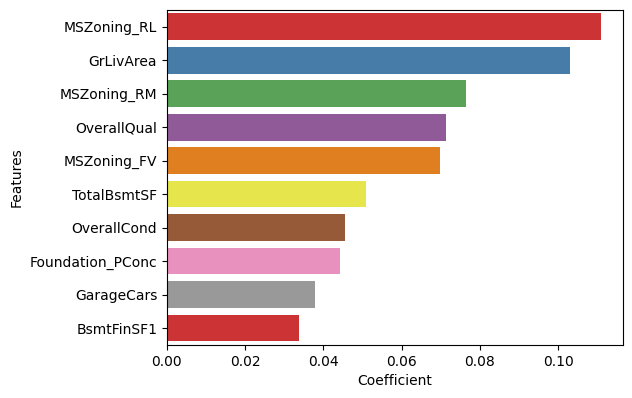

In [114]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price 
of a house.  

## Conclusion :

- The optimal lambda value in case of Ridge and Lasso is as below:
    - Ridge - 10
    - Lasso - 0.0004
    
- The Mean Squared error in case of Ridge and Lasso are:
    - Ridge - 0.01361
    - Lasso - 0.01332

- The Mean Squared Error of Lasso is slightly lower than that of Ridge

- Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a 
  better edge over Ridge.
  
- Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area
  square feet, Overall quality and condition of the house, Foundation type of the house, Number of cars that can be 
  accomodated in the garage, Total basement area in square feet and the Basement finished square feet area 
    
Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the 
price of a house.